In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

pd.set_option('display.float_format', lambda x: '%.2f' % x)

#load in data set
url = 'https://raw.githubusercontent.com/logan-donaldson/rain-prediction/main/weatherAUS.csv'
df = pd.read_csv(url)

#convert date to a DateTime object
df['Date'] =  pd.to_datetime(df['Date'])

#drop rows with NA values associated with the response
df.dropna(subset=['Rainfall','RainToday','RainTomorrow'], inplace=True)

X = np.array(df.drop(['RainTomorrow'], axis=1))
y = np.array(df['RainTomorrow'])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)
X_train, X_test = pd.DataFrame(X_train), pd.DataFrame(X_test)
X_train.columns, X_test.columns = df.columns[:-1], df.columns[:-1]

#create a column containing only the month
X_train['Month'], X_test['Month'] = X_train['Date'].dt.month, X_train['Date'].dt.month
X_train['Month'], X_test['Month'] = X_train['Month'].astype(str), X_test['Month'].astype(str)

#seperate the predictors into two groups for different imputation techniques
X_train_categorical = X_train[['Date','Month','Location','WindDir9am','WindDir3pm','WindGustDir','RainToday']]
X_test_categorical = X_test[['Date','Month','Location','WindDir9am','WindDir3pm','WindGustDir','RainToday']]

X_train_continuous = X_train.drop(['Date','Month','Location','WindDir9am','WindDir3pm','WindGustDir','RainToday'], axis=1)
X_test_continuous = X_test.drop(['Date','Month','Location','WindDir9am','WindDir3pm','WindGustDir','RainToday'], axis=1)

X_train_categorical.fillna(method='ffill', inplace = True)
X_test_categorical.fillna(method='ffill', inplace = True)

imputer = IterativeImputer(estimator = BayesianRidge(), max_iter = 100, min_value = X_train_continuous.min(axis=0), max_value = X_train_continuous.max(axis=0), random_state=42)
imputer.fit(np.array(X_train_continuous))
X_train_continuous_imputed = pd.DataFrame(imputer.transform(np.array(X_train_continuous)))
X_test_continuous_imputed = pd.DataFrame(imputer.transform(np.array(X_test_continuous)))
X_train_continuous_imputed.columns, X_test_continuous_imputed.columns = X_train_continuous.columns, X_test_continuous.columns

X_train_continuous_imputed = X_train_continuous_imputed.round(1).astype('float')
X_test_continuous_imputed = X_test_continuous_imputed.round(1).astype('float')
X_train_continuous_imputed[['Cloud3pm','Cloud9am']] = X_train_continuous_imputed[['Cloud3pm','Cloud9am']].round(0).astype('float')
X_test_continuous_imputed[['Cloud3pm','Cloud9am']] = X_test_continuous_imputed[['Cloud3pm','Cloud9am']].round(0).astype('float')

X_train_full = pd.concat([X_train_continuous_imputed, X_train_categorical], axis=1)
X_test_full = pd.concat([X_test_continuous_imputed, X_test_categorical], axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


KeyboardInterrupt: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

print(X_train_full.isna().sum())

X_train_full.to_csv('/content/drive/My Drive/X_train_new.csv')
X_test_full.to_csv('/content/drive/My Drive/X_test_new.csv')
pd.DataFrame(y_train).to_csv('/content/drive/My Drive/y_train_new.csv')
pd.DataFrame(y_test).to_csv('/content/drive/My Drive/y_test_new.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


NameError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
X_train = pd.read_csv('/content/drive/My Drive/X_train_new.csv')
X_test = pd.read_csv('/content/drive/My Drive/X_test_new.csv')
y_train = pd.read_csv('/content/drive/My Drive/y_train_new.csv')
y_test = pd.read_csv('/content/drive/My Drive/y_test_new.csv')

url = 'https://raw.githubusercontent.com/logan-donaldson/rain-prediction/main/weatherAUS.csv'
df = pd.read_csv(url)

In [ ]:
X_train.drop(['Unnamed: 0'], axis = 1, inplace = True)
X_test.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
X_train.drop(['Date'], axis = 1, inplace = True)
X_test.drop(['Date'], axis = 1, inplace = True)

In [ ]:
X_train['Month'] = X_train['Month'].astype('object')
X_test['Month'] = X_test['Month'].astype('object')

In [ ]:
X_train = pd.get_dummies(X_train, drop_first = True)
X_test = pd.get_dummies(X_test, drop_first = True)

In [ ]:

y_train = y_train.replace({'No': 0, 'Yes': 1})
y_test = y_test.replace({'No': 0, 'Yes': 1})
y_train.drop('Unnamed: 0', axis = 1, inplace = True)
y_test.drop('Unnamed: 0', axis = 1, inplace = True)
y_train = np.array(y_train).ravel()
y_test = np.array(y_test).ravel()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
scaler = StandardScaler(with_std = True)
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

X_train_s = pd.DataFrame(X_train_s, columns = X_train.columns)
X_test_s = pd.DataFrame(X_test_s, columns = X_test.columns)

#X_train_s.to_csv('/content/drive/My Drive/X_train_scaled.csv')
#X_test_s.to_csv('/content/drive/My Drive/X_test_scaled.csv')

X_train_quant = X_train.select_dtypes(include='float64')
X_test_quant = X_test.select_dtypes(include='float64')
X_train_e = X_train.select_dtypes(exclude='float64')
X_test_e = X_test.select_dtypes(exclude='float64')

poly = PolynomialFeatures(degree = 2, interaction_only = False, include_bias = False)
poly = poly.fit(X_train_quant)
X_train_i = pd.DataFrame(poly.transform(X_train_quant))
X_test_i = pd.DataFrame(poly.transform(X_test_quant))

X_train_p = pd.concat([X_train_i, X_train_e], axis = 1)
X_test_p = pd.concat([X_test_i, X_test_e], axis = 1)

scaler = StandardScaler(with_std = True)
scaler = scaler.fit(X_train_p)
X_train_p = scaler.transform(X_train_p)
X_test_p = scaler.transform(X_test_p)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [ ]:
X_train_s.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE', 'WindGustDir_SSE',
       'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW',
       'WindGustDir_WSW', 'RainToday_Yes'],
      dtype='object', length=121)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def roc(best_model, X_test, y_test):
    preds = best_model.predict_proba(X_test)[:,1]

    fpr, tpr, thresholds = roc_curve(y_test, preds)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    print('Maximum tpr - fpr: ' + str(max(tpr - fpr)))

    lineStart,lineEnd=0,1
    plt.plot(fpr,tpr,color="b")
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    
    return optimal_threshold

def roc_new(best_model, X_test, y_test):
    preds = best_model.predict(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, preds)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    print('Maximum tpr - fpr: ' + str(max(tpr - fpr)))

    lineStart,lineEnd=0,1
    plt.plot(fpr,tpr,color="b")
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    
    return optimal_threshold


clf = LogisticRegression(max_iter = 1000)
param_grid = [{'penalty':['l2','l1'],'C':[.001,.01,.1,1,10,100], 'class_weight':['balanced', None], 'solver':['saga']}]
grid_search = GridSearchCV(clf, param_grid, scoring = 'accuracy', n_jobs = -2, verbose = 4)
grid_search.fit(X_train_s, y_train) 
print(grid_search.best_params_)
optimal_clf = grid_search.best_estimator_



Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END C=0.001, class_weight=balanced, penalty=l2, solver=saga;, score=0.797 total time=   2.3s
[CV 2/5] END C=0.001, class_weight=balanced, penalty=l2, solver=saga;, score=0.798 total time=   2.2s


KeyboardInterrupt: ignored

In [ ]:
clf = LogisticRegression(max_iter = 1000)
param_grid = [{'penalty':['l2'],'C':[.01], 'class_weight':[None], 'solver':['saga']}]
grid_search = GridSearchCV(clf, param_grid, scoring = 'accuracy', n_jobs = -2, verbose = 4)
grid_search.fit(X_train_s, y_train) 
print(grid_search.best_params_)
optimal_clf = grid_search.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits


KeyboardInterrupt: ignored

0.8487108459407628


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


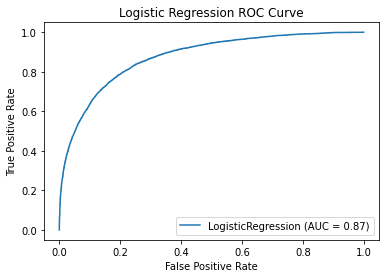

In [ ]:
from sklearn.metrics import plot_roc_curve
print(accuracy_score(y_test, optimal_clf.predict(X_test_s)))
plot_roc_curve(optimal_clf, X_test_s, y_test)
ax = plt.gca()
ax.set_ylabel('True Positive Rate')
ax.set_xlabel('False Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
param_grid = [{'solver':['lsqr','eigen','svd'], 'shrinkage':['auto',None]}]
grid_search = GridSearchCV(clf, param_grid, scoring = 'accuracy', n_jobs = -2, verbose = 4)
grid_search.fit(X_train_quant, y_train) 
print(grid_search.best_params_)
optimal_clf = grid_search.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END .......shrinkage=auto, solver=lsqr;, score=0.847 total time=   0.4s
[CV 2/5] END .......shrinkage=auto, solver=lsqr;, score=0.847 total time=   0.3s
[CV 3/5] END .......shrinkage=auto, solver=lsqr;, score=0.844 total time=   0.3s
[CV 4/5] END .......shrinkage=auto, solver=lsqr;, score=0.847 total time=   0.3s
[CV 5/5] END .......shrinkage=auto, solver=lsqr;, score=0.847 total time=   0.3s
[CV 1/5] END ......shrinkage=auto, solver=eigen;, score=0.847 total time=   0.3s
[CV 2/5] END ......shrinkage=auto, solver=eigen;, score=0.847 total time=   0.3s
[CV 3/5] END ......shrinkage=auto, solver=eigen;, score=0.844 total time=   0.3s
[CV 4/5] END ......shrinkage=auto, solver=eigen;, score=0.847 total time=   0.3s
[CV 5/5] END ......shrinkage=auto, solver=eigen;, score=0.847 total time=   0.3s
[CV 1/5] END ..........shrinkage=auto, solver=svd;, score=nan total time=   0.0s
[CV 2/5] END ..........shrinkage=auto, solver=svd

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py", line 583, in fit
    raise NotImplementedError("shrinkage not supported")
NotImplementedError: shrinkage not supported

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selec

{'shrinkage': 'auto', 'solver': 'lsqr'}


0.8442716101995881


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


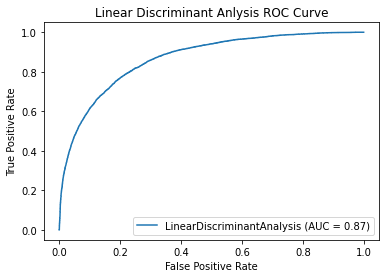

In [ ]:
from sklearn.metrics import plot_roc_curve
print(accuracy_score(y_test, optimal_clf.predict(X_test_quant)))
plot_roc_curve(optimal_clf, X_test_quant, y_test)
ax = plt.gca()
ax.set_ylabel('True Positive Rate')
ax.set_xlabel('False Positive Rate')
plt.title('Linear Discriminant Anlysis ROC Curve')
plt.show()

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis()
param_grid = [{'reg_param':[.001,.01,.1,0.,.25,.5,.75,1]}]
grid_search = GridSearchCV(clf, param_grid, scoring = 'accuracy', n_jobs = -2, verbose = 4)
grid_search.fit(X_train_quant, y_train) 
print(grid_search.best_params_)
optimal_clf = grid_search.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ...................reg_param=0.001;, score=0.829 total time=   0.1s
[CV 2/5] END ...................reg_param=0.001;, score=0.830 total time=   0.1s
[CV 3/5] END ...................reg_param=0.001;, score=0.827 total time=   0.1s
[CV 4/5] END ...................reg_param=0.001;, score=0.829 total time=   0.1s
[CV 5/5] END ...................reg_param=0.001;, score=0.832 total time=   0.1s
[CV 1/5] END ....................reg_param=0.01;, score=0.829 total time=   0.1s
[CV 2/5] END ....................reg_param=0.01;, score=0.830 total time=   0.1s
[CV 3/5] END ....................reg_param=0.01;, score=0.827 total time=   0.1s
[CV 4/5] END ....................reg_param=0.01;, score=0.829 total time=   0.1s
[CV 5/5] END ....................reg_param=0.01;, score=0.832 total time=   0.2s
[CV 1/5] END .....................reg_param=0.1;, score=0.830 total time=   0.2s
[CV 2/5] END .....................reg_param=0.1;,

0.8314155834931458


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


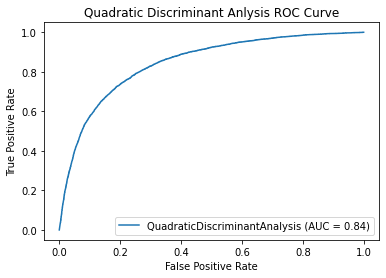

In [ ]:
from sklearn.metrics import plot_roc_curve
print(accuracy_score(y_test, optimal_clf.predict(X_test_quant)))
plot_roc_curve(optimal_clf, X_test_quant, y_test)
ax = plt.gca()
ax.set_ylabel('True Positive Rate')
ax.set_xlabel('False Positive Rate')
plt.title('Quadratic Discriminant Anlysis ROC Curve')
plt.show()

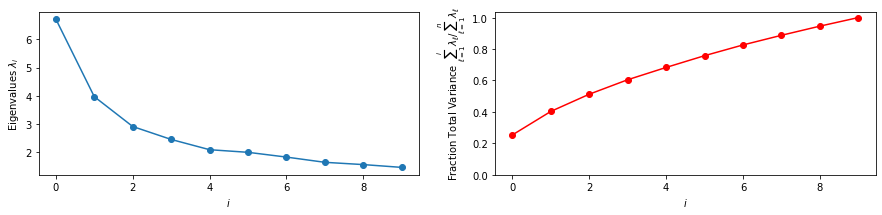

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10, whiten=False)
X_train_pca = pca.fit_transform(X_train_s)
X_test_pca = pca.transform(X_test_s)
E, L = pca.components_.T, pca.explained_variance_

plt.figure(figsize=(15,3))
plt.subplot(121); plt.plot(L,'o-'); plt.xlabel(r'$i$');plt.ylabel(r'Eigenvalues $\lambda_i$');
plt.subplot(122); cl=np.cumsum(L); plt.xlabel(r'$i$');plt.ylabel(r'Fraction Total Variance $\sum_{\ell=1}^i \lambda_\ell / \sum_{\ell=1}^n \lambda_\ell $');
ratio = cl/cl[-1]
plt.plot(ratio,'o-r'); plt.ylim(0,None);

In [ ]:
m = np.full(len(X_train_pca), False)
m[:10000] = True
np.random.shuffle(m)

mt = np.full(len(X_test_pca), False)
mt[:2000] = True
np.random.shuffle(mt)

y_train_sample = y_train[m]
X_train_sample = X_train_pca[m]

y_test_sample = y_test[mt]
X_test_sample = X_test_pca[mt]

X_train_sample_full = X_train_s[m]
X_test_sample_full = X_test_s[mt]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = knn(n_jobs = -1)
param_grid = [{'weights':['uniform','distance'],'n_neighbors':[30,40,50]}]
grid_search = GridSearchCV(clf, param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 4)
grid_search.fit(X_train_sample, y_train_sample) 
print(grid_search.best_params_)
optimal_clf = grid_search.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'n_neighbors': 40, 'weights': 'distance'}


0.827153917181618


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


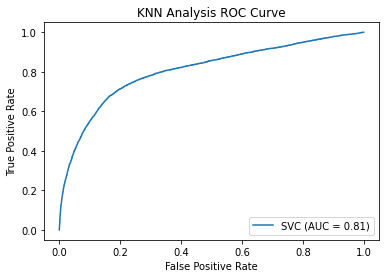

In [ ]:
from sklearn.metrics import plot_roc_curve
print(accuracy_score(y_test, optimal_clf.predict(X_test_pca)))
plot_roc_curve(optimal_clf, X_test_pca, y_test)
ax = plt.gca()
ax.set_ylabel('True Positive Rate')
ax.set_xlabel('False Positive Rate')
plt.title('KNN Analysis ROC Curve')
plt.show()

In [ ]:
from sklearn.svm import SVC

clf = SVC()
param_grid = [{'C':[.5,1],'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'class_weight':['balanced',None]}]
grid_search = GridSearchCV(clf, param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 4)
grid_search.fit(X_train_sample, y_train_sample) 
print(grid_search.best_params_)
optimal_clf = grid_search.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
{'C': 1, 'class_weight': None, 'kernel': 'rbf'}


0.8345408054549329


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


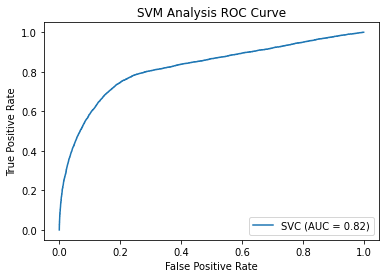

SVC(C=1)


In [ ]:
from sklearn.metrics import plot_roc_curve
print(accuracy_score(y_test, optimal_clf.predict(X_test_pca)))
plot_roc_curve(optimal_clf, X_test_pca, y_test)
ax = plt.gca()
ax.set_ylabel('True Positive Rate')
ax.set_xlabel('False Positive Rate')
plt.title('SVM Analysis ROC Curve')
plt.show()
print(optimal_clf)

In [ ]:
from sklearn.svm import SVC

clf = SVC()
param_grid = [{'C':[1],'kernel':['linear']}]
grid_search = GridSearchCV(clf, param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 4)
grid_search.fit(X_train_sample_full.iloc[:,1].values.reshape(-1,1), y_train_sample) 
print(grid_search.best_params_)
optimal_clf = grid_search.best_estimator_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'C': 1, 'kernel': 'linear'}


In [ ]:
from sklearn.metrics import plot_roc_curve
print(accuracy_score(y_test_sample, optimal_clf.predict(X_test_sample_full.iloc[:,1].values.reshape(-1,1))))
plot_roc_curve(optimal_clf, X_test_s, y_test)
ax = plt.gca()
ax.set_ylabel('True Positive Rate')
ax.set_xlabel('False Positive Rate')
plt.title('SVM Analysis ROC Curve')
plt.show()
print(optimal_clf)

0.774


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


ValueError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs = -1)
#param_grid = [{'n_estimators':[100],'criterion':['gini', 'entropy'], 'max_depth':[2,5,10,None], 'min_samples_split':[2,10,100], 'max_features':['auto', 'sqrt', 'log2',0.8]}]
param_grid = [{'n_estimators':[100],'criterion':['gini'], 'min_samples_split':[2,10,100], 'max_features':['auto', 'sqrt', 'log2', 0.8, 1]}]
grid_search = GridSearchCV(clf, param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 4)
grid_search.fit(X_train_sample_full, y_train_sample) 
print(grid_search.best_params_)
optimal_clf = grid_search.best_estimator_

Fitting 5 folds for each of 15 candidates, totalling 75 fits
{'criterion': 'gini', 'max_features': 0.8, 'min_samples_split': 10, 'n_estimators': 100}


0.8487463598266922


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


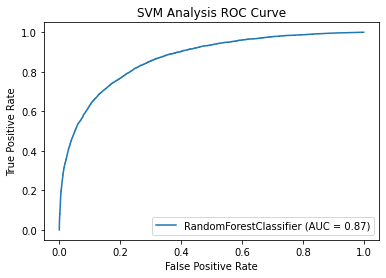

RandomForestClassifier(max_features=0.8, min_samples_split=10, n_jobs=-1)


In [ ]:
from sklearn.metrics import plot_roc_curve
print(accuracy_score(y_test, optimal_clf.predict(X_test_s)))
plot_roc_curve(optimal_clf, X_test_s, y_test)
ax = plt.gca()
ax.set_ylabel('True Positive Rate')
ax.set_xlabel('False Positive Rate')
plt.title('SVM Analysis ROC Curve')
plt.show()
print(optimal_clf)

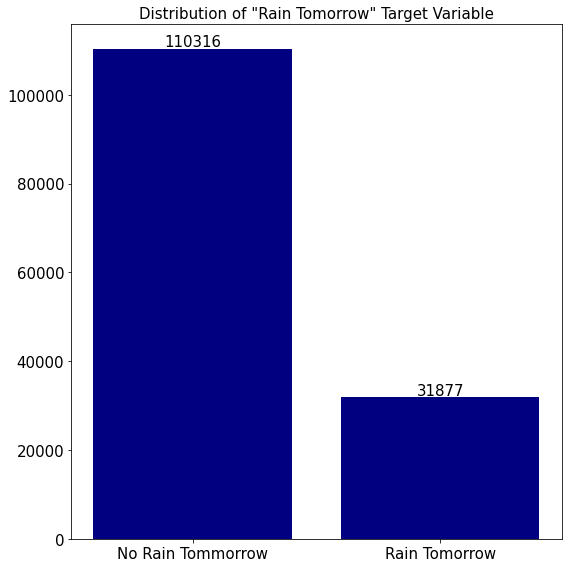

In [ ]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma']

plt.figure(figsize=(8, 8))
y = df['RainTomorrow'].dropna()
y = y.replace({'No': 0, 'Yes': 1})
num_rain = sum(y)
num_no_rain = len(y) - sum(y) 
plt.bar(x = [1,2], height = [num_no_rain, num_rain], color = 'navy')
plt.title('Distribution of "Rain Tomorrow" Target Variable', fontsize = 15)
plt.xticks([1,2], ['No Rain Tommorrow','Rain Tomorrow'], horizontalalignment='center', fontsize = 15)
plt.yticks(fontsize=15)
plt.text(x = 1, y = num_no_rain + 500, s = str(num_no_rain), horizontalalignment='center', fontsize = 15)
plt.text(x = 2, y = num_rain + 500, s = str(num_rain), horizontalalignment='center', fontsize = 15)
plt.tight_layout()

Index(['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am', 'Pressure9am',
       'Pressure3pm', 'WindDir9am', 'WindGustDir', 'WindGustSpeed',
       'Humidity3pm', 'WindDir3pm', 'Temp3pm', 'RainTomorrow', 'RainToday',
       'Rainfall', 'WindSpeed3pm', 'Humidity9am', 'WindSpeed9am', 'Temp9am',
       'MinTemp', 'MaxTemp', 'Location', 'Date'],
      dtype='object')


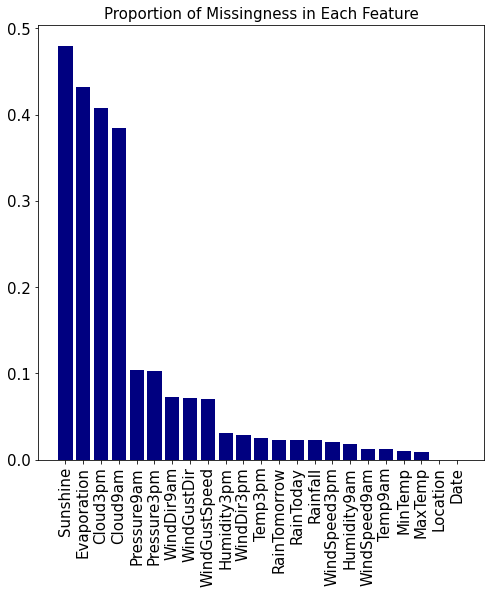

In [ ]:
import numpy as np

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Tahoma']

plt.figure(figsize=(8, 8))
missing = df.isna().sum() / len(df)
missing.sort_values(ascending = False, inplace = True)
plt.bar(np.arange(len(missing)), missing, color = 'navy')
plt.title('Proportion of Missingness in Each Feature', fontsize=15)
plt.yticks(fontsize=15)

ax = plt.gca()
ax.set_xticks(range(0, len(missing)))
ax.set_xticklabels(missing.index, rotation = 90, fontsize = 15, minor = False)
print(missing.index)



In [ ]:
url = 'https://raw.githubusercontent.com/logan-donaldson/rain-prediction/main/weatherAUS.csv'
df = pd.read_csv(url)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

X_train = pd.read_csv('/content/drive/My Drive/X_train_new.csv')
X_test = pd.read_csv('/content/drive/My Drive/X_test_new.csv')
y_train = pd.read_csv('/content/drive/My Drive/y_train_new.csv')
y_test = pd.read_csv('/content/drive/My Drive/y_test_new.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X_train['RainToday'].replace({'No':0,'Yes':1},inplace =True)
X_test['RainToday'].replace({'No':0,'Yes':1},inplace =True)
y_train.replace({'No':0,'Yes':1},inplace =True)
y_test.replace({'No':0,'Yes':1},inplace =True)

X_train = X_train.drop(labels = 'Date', axis = 1)
X_test = X_test.drop(labels = 'Date', axis = 1)
X_train = X_train.drop(labels = 'Unnamed: 0', axis = 1)
X_test = X_test.drop(labels = 'Unnamed: 0', axis = 1)
y_train = y_train.drop(labels = 'Unnamed: 0', axis = 1)
y_test = y_test.drop(labels = 'Unnamed: 0', axis = 1)

X_train_encode = X_train.copy()
X_test_encode = X_test.copy()

from sklearn import preprocessing
from sklearn.decomposition import PCA
coder = preprocessing.LabelEncoder()
X_train_encode['Location'] = coder.fit_transform(X_train_encode['Location'])
X_train_encode['WindDir9am'] = coder.fit_transform(X_train_encode['WindDir9am'])
X_train_encode['WindDir3pm'] = coder.fit_transform(X_train_encode['WindDir3pm'])
X_train_encode['WindGustDir'] = coder.fit_transform(X_train_encode['WindGustDir'])
X_test_encode['Location'] = coder.fit_transform(X_test_encode['Location'])
X_test_encode['WindDir9am'] = coder.fit_transform(X_test_encode['WindDir9am'])
X_test_encode['WindDir3pm'] = coder.fit_transform(X_test_encode['WindDir3pm'])
X_test_encode['WindGustDir'] = coder.fit_transform(X_test_encode['WindGustDir'])

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(X_train_encode)
X_train_encode_scaled = scaler.transform(X_train_encode)
X_test_encode_scaled = scaler.transform(X_test_encode)

pca = PCA(n_components = 10)
pca = pca.fit(X_train_encode_scaled)
X_train_encode_scaled = pca.transform(X_train_encode_scaled)
X_test_encode_scaled = pca.transform(X_test_encode_scaled)


##########

X_train_dummy = X_train.copy()
X_test_dummy = X_test.copy()

X_train_dummy['Month'] = X_train_dummy['Month'].astype('object')
X_test_dummy['Month'] = X_test_dummy['Month'].astype('object')

X_train_dummy = pd.get_dummies(X_train_dummy, drop_first = True)
X_test_dummy = pd.get_dummies(X_test_dummy, drop_first = True)

scaler = StandardScaler()
scaler = scaler.fit(X_train_dummy)
X_train_dummy_scaled = scaler.transform(X_train_dummy)
X_test_dummy_scaled = scaler.transform(X_test_dummy)

pca = PCA(n_components = 10)
pca = pca.fit(X_train_dummy_scaled)
X_train_dummy_scaled = pca.transform(X_train_dummy_scaled)
X_test_dummy_scaled = pca.transform(X_test_dummy_scaled)

In [ ]:
m = np.full(len(X_train), False)
m[:10000] = True
np.random.shuffle(m)

mt = np.full(len(X_test), False)
mt[:4000] = True
np.random.shuffle(mt)

y_train_sample = y_train[m]
y_test_sample = y_test[mt]

X_train_encode = X_train_encode[m]
X_train_encode_scaled = X_train_encode_scaled[m]
X_test_encode= X_test_encode[mt]
X_test_encode_scaled = X_test_encode_scaled[mt]

X_train_dummy = X_train_dummy[m]
X_train_dummy_scaled = X_train_dummy_scaled[m]
X_test_dummy = X_test_dummy[mt]
X_test_dummy_scaled = X_test_dummy_scaled[mt]

#X_train_sample_full = X_train_s[m]
#X_test_sample_full = X_test_s[mt]

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import accuracy_score

In [ ]:
knn = KNeighborsClassifier(n_jobs = -1)
parameters = {'weights':['uniform','distance'], 'n_neighbors': [1,5,10,20,40,50,60]}
grid = GridSearchCV(knn, parameters, cv = 5, n_jobs = -1, verbose = 4)
grid.fit(X_train_encode_scaled, y_train_sample)
print(grid.best_params_)
print(grid.best_score_)
model = grid.best_estimator_
accuracy_score(y_test_sample, model.predict(X_test_encode_scaled))

Fitting 5 folds for each of 14 candidates, totalling 70 fits


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


{'n_neighbors': 60, 'weights': 'distance'}
0.83605


0.83725

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


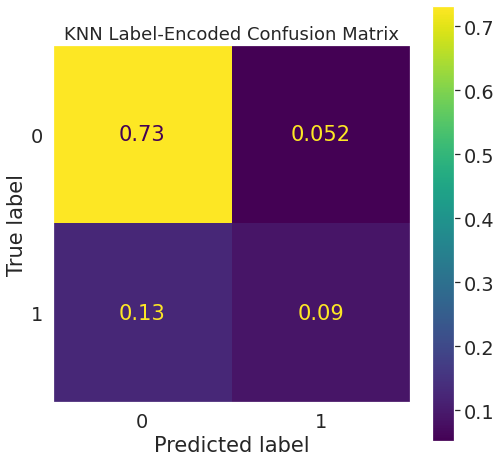

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

sns.set(font_scale=1.75)
plt.figure(figsize = (8,8))
plt.grid(False)
ax = plt.gca()
plot_confusion_matrix(model, X_test_encode_scaled, y_test_sample, normalize = 'all', ax = ax)
plt.title('KNN Label-Encoded Confusion Matrix', fontsize=18)

ax = plt.gca()


0.82125


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


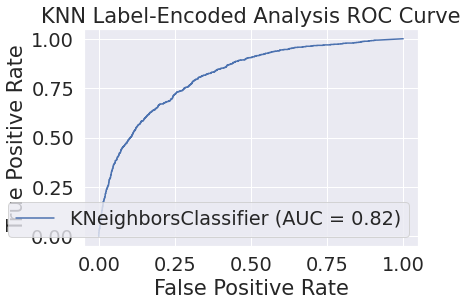

KNeighborsClassifier(n_jobs=-1, n_neighbors=40, weights='distance')


In [ ]:
from sklearn.metrics import plot_roc_curve
print(accuracy_score(y_test_sample, model.predict(X_test_encode_scaled)))
plot_roc_curve(model, X_test_encode_scaled, y_test_sample)
ax = plt.gca()
ax.set_ylabel('True Positive Rate')
ax.set_xlabel('False Positive Rate')
plt.title('KNN Label-Encoded Analysis ROC Curve')
plt.show()
print(model)

In [ ]:
knn = KNeighborsClassifier(n_jobs = -1)
parameters = {'weights':['uniform','distance'], 'n_neighbors': [1,5,10,20,40,50,60]}
grid = GridSearchCV(knn, parameters, cv = 5, n_jobs = -1, verbose = 4)
grid.fit(X_train_dummy_scaled, y_train_sample)
print(grid.best_params_)
print(grid.best_score_)
model = grid.best_estimator_
accuracy_score(y_test_sample, model.predict(X_test_dummy_scaled))

plot_confusion_matrix(model, X_test_dummy_scaled, y_test_sample, normalize = 'all', ax = ax)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


{'n_neighbors': 40, 'weights': 'distance'}
0.82775


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


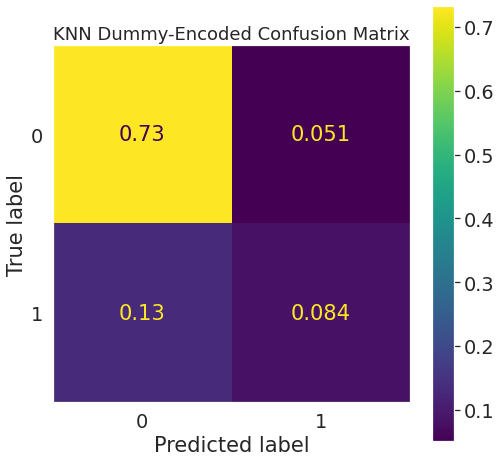

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

sns.set(font_scale=1.75)
plt.figure(figsize = (8,8))
plt.grid(False)
ax = plt.gca()
plot_confusion_matrix(model, X_test_encode_scaled, y_test_sample, normalize = 'all', ax = ax)
plt.title('KNN Dummy-Encoded Confusion Matrix', fontsize=18)

ax = plt.gca()


0.84125


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


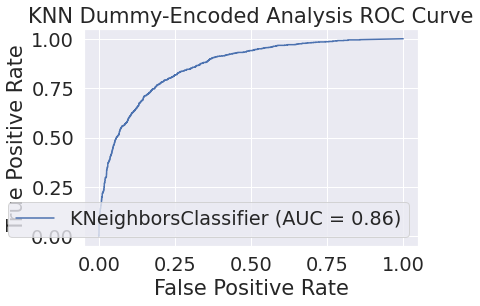

KNeighborsClassifier(n_jobs=-1, n_neighbors=40, weights='distance')


In [ ]:
from sklearn.metrics import plot_roc_curve
print(accuracy_score(y_test_sample, model.predict(X_test_dummy_scaled)))
plot_roc_curve(model, X_test_dummy_scaled, y_test_sample)
ax = plt.gca()
ax.set_ylabel('True Positive Rate')
ax.set_xlabel('False Positive Rate')
plt.title('KNN Dummy-Encoded Analysis ROC Curve')
plt.show()
print(model)

In [ ]:
from sklearn.svm import SVC

clf = SVC()
param_grid = [{'C':[.1,1,2,10],'kernel':['linear', 'poly', 'rbf', 'sigmoid']}]
grid_search = GridSearchCV(clf, param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 4)
grid_search.fit(X_train_encode_scaled, y_train_sample) 
print(grid_search.best_params_)
print(grid_search.best_score_)
optimal_clf = grid_search.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 1, 'kernel': 'rbf'}
0.8384


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


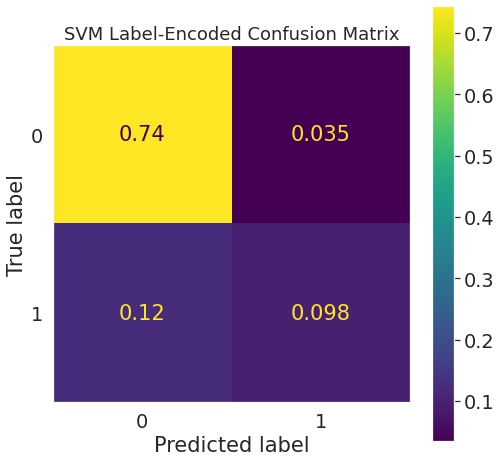

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

sns.set(font_scale=1.75)
plt.figure(figsize = (8,8))
plt.grid(False)
ax = plt.gca()
plot_confusion_matrix(optimal_clf, X_test_encode_scaled, y_test_sample, normalize = 'all', ax = ax)
plt.title('SVM Label-Encoded Confusion Matrix', fontsize=18)

ax = plt.gca()


0.84075


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


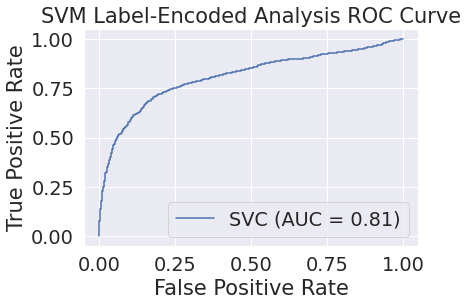

KNeighborsClassifier(n_jobs=-1, n_neighbors=40, weights='distance')


In [ ]:
from sklearn.metrics import plot_roc_curve
print(accuracy_score(y_test_sample, optimal_clf.predict(X_test_encode_scaled)))
plot_roc_curve(optimal_clf, X_test_encode_scaled, y_test_sample)
ax = plt.gca()
ax.set_ylabel('True Positive Rate')
ax.set_xlabel('False Positive Rate')
plt.title('SVM Label-Encoded Analysis ROC Curve')
plt.show()
print(model)

In [ ]:
from sklearn.svm import SVC

clf = SVC()
param_grid = [{'C':[.1,1,2,10],'kernel':['linear', 'poly', 'rbf', 'sigmoid']}]
grid_search = GridSearchCV(clf, param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 4)
grid_search.fit(X_train_dummy_scaled, y_train_sample) 
print(grid_search.best_params_)
print(grid_search.best_score_)
optimal_clf = grid_search.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'C': 1, 'kernel': 'rbf'}
0.8371000000000001


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


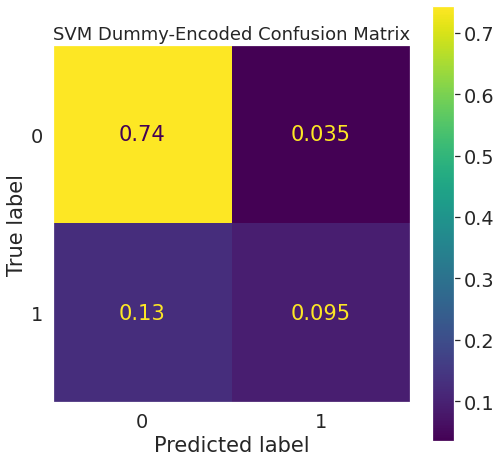

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns

sns.set(font_scale=1.75)
plt.figure(figsize = (8,8))
plt.grid(False)
ax = plt.gca()
plot_confusion_matrix(optimal_clf, X_test_dummy_scaled, y_test_sample, normalize = 'all', ax = ax)
plt.title('SVM Dummy-Encoded Confusion Matrix', fontsize=18)

ax = plt.gca()

0.83775


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


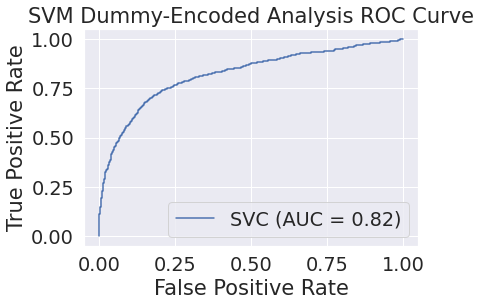

KNeighborsClassifier(n_jobs=-1, n_neighbors=40, weights='distance')


In [ ]:
from sklearn.metrics import plot_roc_curve
print(accuracy_score(y_test_sample, optimal_clf.predict(X_test_dummy_scaled)))
plot_roc_curve(optimal_clf, X_test_dummy_scaled, y_test_sample)
ax = plt.gca()
ax.set_ylabel('True Positive Rate')
ax.set_xlabel('False Positive Rate')
plt.title('SVM Dummy-Encoded Analysis ROC Curve')
plt.show()
print(model)

-----------------------------------------------------------------

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/logan-donaldson/rain-prediction/main/weatherAUS.csv'
df = pd.read_csv(url)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from google.colab import drive

drive.mount('/content/drive')
X_train = pd.read_csv('/content/drive/My Drive/X_train_new.csv')
X_test = pd.read_csv('/content/drive/My Drive/X_test_new.csv')
y_train = pd.read_csv('/content/drive/My Drive/y_train_new.csv')
y_test = pd.read_csv('/content/drive/My Drive/y_test_new.csv')

X_train.drop(['Unnamed: 0','Date'], axis = 1, inplace = True)
X_test.drop(['Unnamed: 0','Date'], axis = 1, inplace = True)
y_train.drop(['Unnamed: 0'], axis = 1, inplace = True)
y_test.drop(['Unnamed: 0'], axis = 1, inplace = True)

y_train = pd.DataFrame(y_train).replace({'No': 0, 'Yes': 1})
y_test = pd.DataFrame(y_test).replace({'No': 0, 'Yes': 1})

X_train['Month'] = X_train['Month'].astype('object')
X_test['Month'] = X_test['Month'].astype('object')

X_train_cat = X_train.iloc[:,16:]
X_test_cat = X_test.iloc[:,16:]
X_train_cont = X_train.iloc[:,:16]
X_test_cont = X_test.iloc[:,:16]

encoder = OrdinalEncoder()
encoder.fit(X_train_cat)
X_train_cat = encoder.transform(X_train_cat)
X_test_cat = encoder.transform(X_test_cat)

from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB

clf = CategoricalNB()
clf.fit(X_train_cat, y_train.values.ravel())
preds_cat = clf.predict_proba(X_test_cat)
print('Categorical Accuracy: ' + str(accuracy_score(y_test, preds_cat.argmax(axis = 1))))
print('Categorical F1-Score: ' + str(f1_score(y_test, preds_cat.argmax(axis = 1))))


clf = GaussianNB()
clf.fit(X_train_cont, y_train.values.ravel())
preds_cont = clf.predict_proba(X_test_cont)
print('Gaussian Accuracy: ' + str(accuracy_score(y_test, preds_cont.argmax(axis = 1))))
print('Gaussian F1-Score: ' + str(f1_score(y_test, preds_cont.argmax(axis = 1))))

preds = preds_cat*preds_cont

print('Combined Accuracy: ' + str(accuracy_score(y_test, preds.argmax(axis = 1))))
print('Combined F1-Score: ' + str(f1_score(y_test, preds.argmax(axis = 1))))




#X_train = pd.get_dummies(X_train)
#X_test = pd.get_dummies(X_test)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Categorical Accuracy: 0.7772213935648838
Categorical F1-Score: 0.3284444920244085
Gaussian Accuracy: 0.796043753107465
Gaussian F1-Score: 0.5906336873618933
Combined Accuracy: 0.8151857376234107
Combined F1-Score: 0.5894603976017672


In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, preds_cont.argmax(axis = 1))

0.7480837944972978

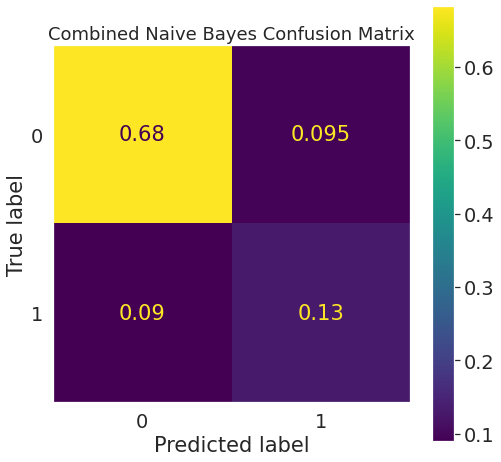

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns



sns.set(font_scale=1.75)
plt.figure(figsize = (8,8))
plt.grid(False)
ax = plt.gca()
ConfusionMatrixDisplay.from_predictions(y_test, preds.argmax(axis = 1), normalize = 'all', ax = ax)
plt.title('Combined Naive Bayes Confusion Matrix', fontsize=18)

ax = plt.gca()